In [16]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import tensorflow as tf


In [17]:
filenames = os.listdir("/Users/pranavtomar/Downloads/dogs-vs-cats/train/")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [18]:
df

,filename,category
0,dog.8011.jpg,1
1,cat.5077.jpg,0
2,dog.7322.jpg,1
3,cat.2718.jpg,0
4,cat.10151.jpg,0
...,...,...
24995,dog.8008.jpg,1
24996,dog.1992.jpg,1
24997,dog.12412.jpg,1
24998,cat.2701.jpg,0


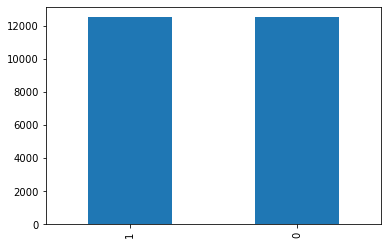

In [19]:
df['category'].value_counts().plot.bar()

In [26]:
#Checking picture
sample = df['filename'][1700]

In [27]:
sample

'dog.4827.jpg'

In [28]:
image = tf.keras.preprocessing.image.load_img('/Users/pranavtomar/Downloads/dogs-vs-cats/train/'+sample)

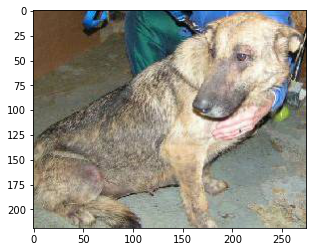

In [29]:
plt.imshow(image)

In [31]:
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [33]:
#Model Creation

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [34]:

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0

In [35]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

In [36]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

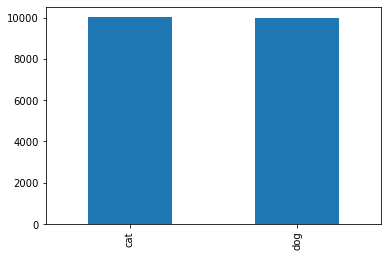

In [37]:
train_df['category'].value_counts().plot.bar()

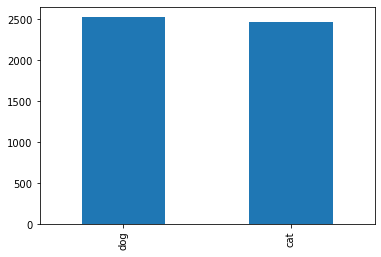

In [38]:
validate_df['category'].value_counts().plot.bar()

In [39]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [41]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/Users/pranavtomar/Downloads/dogs-vs-cats/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [43]:
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/Users/pranavtomar/Downloads/dogs-vs-cats/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [46]:

history = model.fit_generator(
    train_generator, 
    epochs=5,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
)

/Users/pranavtomar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1333/1333 [==============================] - 344s 257ms/step - loss: 0.7076 - accuracy: 0.5624 - val_loss: 0.5500 - val_accuracy: 0.7179
Epoch 2/5
1333/1333 [==============================] - 351s 263ms/step - loss: 0.5985 - accuracy: 0.6857 - val_loss: 0.5287 - val_accuracy: 0.7381
Epoch 3/5
1333/1333 [==============================] - 313s 235ms/step - loss: 0.5470 - accuracy: 0.7294 - val_loss: 0.4843 - val_accuracy: 0.7670
Epoch 4/5
1333/1333 [==============================] - 313s 235ms/step - loss: 0.5271 - accuracy: 0.7553 - val_loss: 0.4939 - val_accuracy: 0.7960
Epoch 5/5
1333/1333 [==============================] - 1424s 1s/step - loss: 0.5277 - accuracy: 0.7607 - val_loss: 0.4482 - val_accuracy: 0.7996


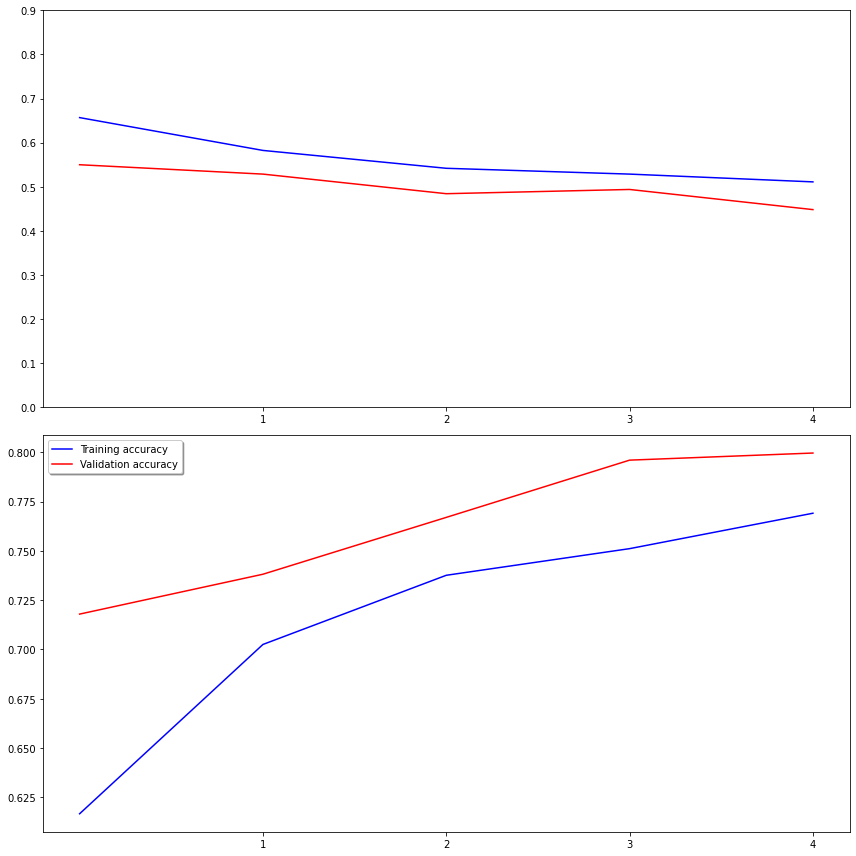

In [49]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 5, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 5, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [50]:
test_filenames = os.listdir("/Users/pranavtomar/Downloads/dogs-vs-cats/test1/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [52]:
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/Users/pranavtomar/Downloads/dogs-vs-cats/test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)


Found 12500 validated image filenames.


In [53]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

/Users/pranavtomar/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [54]:
test_df['category'] = np.argmax(predict, axis=-1)

In [56]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

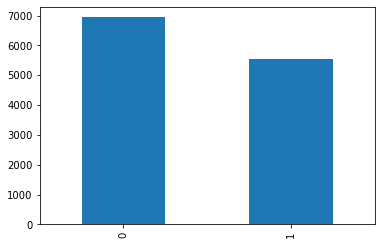

In [57]:
test_df['category'].value_counts().plot.bar()

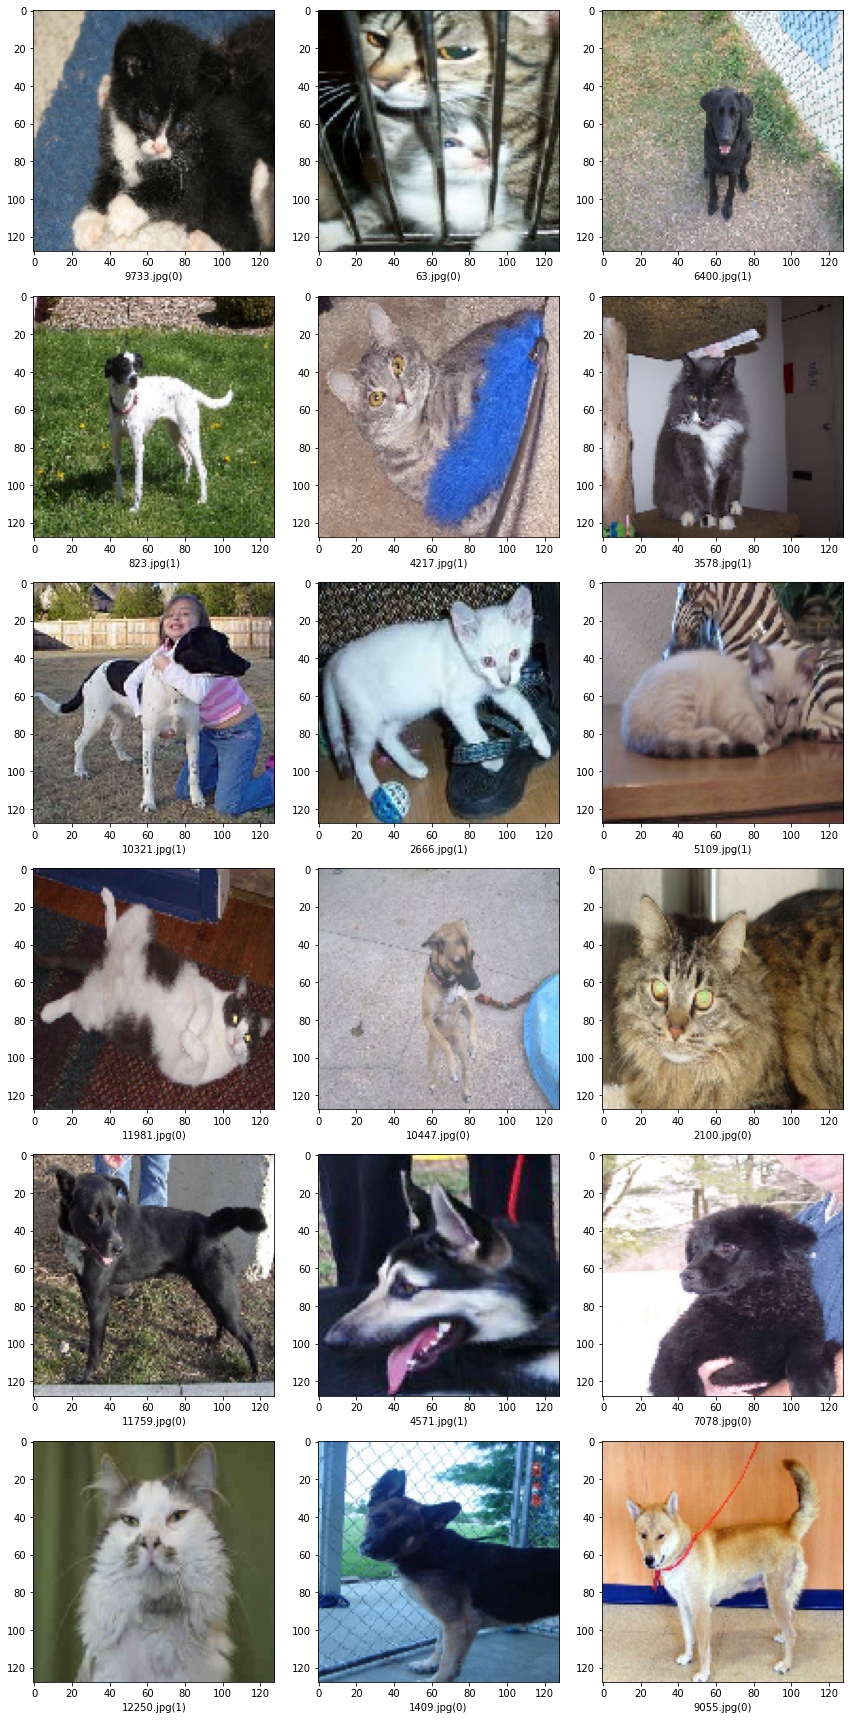

In [60]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = tf.keras.preprocessing.image.load_img("/Users/pranavtomar/Downloads/dogs-vs-cats/test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [61]:
predict

array([[0.8498137 , 0.15018629],
       [0.6861036 , 0.31389636],
       [0.20544286, 0.79455715],
       ...,
       [0.68861276, 0.31138724],
       [0.9565171 , 0.04348293],
       [0.00248188, 0.9975182 ]], dtype=float32)

In [62]:
test_df

,filename,category
0,9733.jpg,0
1,63.jpg,0
2,6400.jpg,1
3,823.jpg,1
4,4217.jpg,1
...,...,...
12495,3561.jpg,0
12496,8434.jpg,1
12497,7707.jpg,0
12498,6419.jpg,0
